In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [30]:
df = pd.read_csv('Categorical.csv')
df

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,North America
1,Afghanistan,66.004734,33.835231,Asia
2,Angola,17.537368,-12.293361,Africa
3,Anguilla,-63.064989,18.223959,North America
4,Albania,20.049834,41.142450,Europe
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,Oceania
237,Yemen,47.586762,15.909280,Asia
238,South Africa,25.083901,-29.000341,Africa
239,Zambia,27.774759,-13.458242,Africa


In [31]:
distance = {}
for i in list(set(df['continent'])):
    if i != 'North America':
        d = np.linalg.norm(np.array(df[df['continent']=='North America'].iloc[:,1:3])-np.array(df[df['continent']==i].iloc[:,1:3])[:,np.newaxis])
        distance[i] = d
        

In [32]:
data = df.iloc[:, 3].map({'North America':0,'Europe':distance['Europe'],
                                'Asia':distance['Asia'],'Africa':distance['Africa'],'South America':distance['South America'], 
                                'Oceania':distance['Oceania'],'Seven seas (open ocean)':distance['Seven seas (open ocean)'], 
                                'Antarctica':distance['Antarctica']})
data = np.array(data)
data = data.reshape(-1, 1)
data

array([[   0.        ],
       [6954.87516908],
       [4312.8644369 ],
       [   0.        ],
       [4131.32723555],
       [4131.32723555],
       [4131.32723555],
       [6954.87516908],
       [1039.48856893],
       [6954.87516908],
       [5786.72014095],
       [ 854.66615537],
       [5786.72014095],
       [2353.99838842],
       [   0.        ],
       [5786.72014095],
       [4131.32723555],
       [6954.87516908],
       [4312.8644369 ],
       [4131.32723555],
       [4312.8644369 ],
       [4312.8644369 ],
       [6954.87516908],
       [4131.32723555],
       [6954.87516908],
       [   0.        ],
       [   0.        ],
       [4131.32723555],
       [   0.        ],
       [4131.32723555],
       [   0.        ],
       [   0.        ],
       [1039.48856893],
       [1039.48856893],
       [   0.        ],
       [6954.87516908],
       [6954.87516908],
       [4312.8644369 ],
       [4312.8644369 ],
       [4131.32723555],
       [1039.48856893],
       [6954.875

In [33]:
kmeans = KMeans(4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [34]:
cluster = kmeans.fit_predict(data)
cluster

array([3, 2, 0, 3, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 3, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 2, 3, 3, 0, 3, 0, 3, 3, 1, 1, 3, 2, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 2, 1, 0, 0, 3, 3, 3, 3, 2, 2, 0, 0, 0, 3, 0, 3, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       2, 1, 2, 1, 3, 0, 3, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0, 3, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0,
       2, 3, 0, 0, 0, 0, 1, 3, 2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 3, 1, 0, 2,
       0, 2, 0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 0, 3,
       2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 3, 0, 0,
       0, 3, 0, 0, 1, 0, 0, 0, 0, 3, 1, 2, 3, 0, 0, 2, 2, 2, 2, 2, 3, 0,
       2, 2, 0, 0, 0, 1, 3, 2, 0, 3, 1, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0],
      dtype=int32)

In [35]:
df['cluster'] = cluster

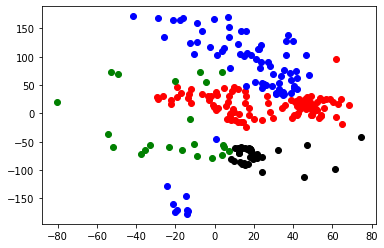

In [36]:
plt.scatter(df[df['cluster']==0]['Latitude'],df[df['cluster']==0]['Longitude'], c='r')
plt.scatter(df[df['cluster']==1]['Latitude'],df[df['cluster']==1]['Longitude'], c='g')
plt.scatter(df[df['cluster']==2]['Latitude'],df[df['cluster']==2]['Longitude'], c='b')
plt.scatter(df[df['cluster']==3]['Latitude'],df[df['cluster']==3]['Longitude'], c='black')
plt.show()